# Can I download the entire TRILEGAL set for all OpSim fields? 

This would significantly speed up the runs on Quest, if I could just have a database to read from!

In [3]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code/vespa_update')
from vespa_update import trilegal as trilegal_update
from TRILEGAL import TRILEGAL
from OpSim import OpSim

print(os.environ['PATH'])

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.
/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/numpy/lib/npyio.py:2313: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


/Volumes/highnoon2go/highnoon/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/vespa_update:/Users/ageller/anaconda3/envs/EBLSST/bin:/Users/ageller/anaconda3/condabin:/Users/ageller/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Frameworks/Mono.framework/Versions/Current/Commands


In [4]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getAllOpSimFields()

getting OpSim fields...
have summary cursor.
have field cursor.
returned 5292 fields


In [8]:
head = pd.read_csv('outputFilesHead.csv')
Nmax = 5e5 #maximum number of stars that we want from TRILEGAL
area0 = np.pi*(3.5/2.)**2. #square degrees (LSST FoV)

for i in range(len(OpS.Nobs)):
    if (OpS.Nobs[i] > 0):

        galaxy = TRILEGAL()
        galaxy.RA = OpS.RA[i]
        galaxy.Dec = OpS.Dec[i]
        galaxy.fieldID = OpS.fieldID[i]
        galaxy.tmpfname = 'TRILEGAL_model_fID_'+str(int(OpS.fieldID[i]))+'.h5'
        galaxy.tmpdir = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/'
        #having trouble getting these
        if (int(OpS.fieldID[i]) == 1757):
            galaxy.area = 1.
#         if (int(OpS.fieldID[i]) != 1322 and int(OpS.fieldID[i]) != 1430 and int(OpS.fieldID[i]) != 1541 \
#         and int(OpS.fieldID[i]) != 1562 and int(OpS.fieldID[i]) != 1563 and int(OpS.fieldID[i]) != 1642 \
#         and int(OpS.fieldID[i]) != 1668 and int(OpS.fieldID[i]) != 1756 and int(OpS.fieldID[i]) != 1757 \
#         and int(OpS.fieldID[i]) != 1779 and int(OpS.fieldID[i]) != 1880 and int(OpS.fieldID[i]) != 1889 \
#         and int(OpS.fieldID[i]) != 2000 and int(OpS.fieldID[i]) != 2011 and int(OpS.fieldID[i]) != 2331 \
#         and int(OpS.fieldID[i]) != 2447 and int(OpS.fieldID[i]) != 2779 and int(OpS.fieldID[i]) != 2891\
#         and int(OpS.fieldID[i]) != 2993 and int(OpS.fieldID[i]) != 2994 and int(OpS.fieldID[i]) != 4203):
#        if (not os.path.exists(os.path.join(galaxy.tmpdir, galaxy.tmpfname))):
            #find the number of expected stars
            #reduce the area if needed so that we don't download more that Nmax stars
            headVal = head.loc[(head['OpSimID'] == OpS.fieldID[i])]
            if (len(headVal.index) > 0):
                print("expected Nstars = ",headVal['NstarsTRILEGAL'].iloc[0])
                if (headVal['NstarsTRILEGAL'].iloc[0] > Nmax):
                    galaxy.area = area0*(Nmax/headVal['NstarsTRILEGAL'].iloc[0])**2.
                    #galaxy.area = area0*(Nmax/headVal['NstarsTRILEGAL'].iloc[0])*2.

                    print("reducing area to", galaxy.area)
            else:
                print('dont have OpSim field in header ', OpS.fieldID[i], len(headVal.index))

            galaxy.downloadModel()
            #else:
                #print(galaxy.tmpfname, "already exists")

print('done')

expected Nstars =  27068.734515498414
downloading model TRILEGAL_model_fID_1757.h5 1.0


KeyboardInterrupt: 

# Should I try to reduce the size of many of these somehow?

maybe I can gzip them (does that reduce the size considerably?), and then upack to read in python?

In [2]:


from astropy.coordinates import SkyCoord
from astropy import units, constants

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f1 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/grid/test.trilegal.GC.h5'
df = pd.read_hdf(f1)
#df2 = pd.read_hdf('grid/test.trilegal.GC.rband.h5')
f2 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/TRILEGAL_model_fID_1.h5'
df2 = pd.read_hdf(f2)

In [4]:
area = 0.

with pd.HDFStore(f1) as store:
    attrs = store.get_storer('df').attrs
    print(attrs.trilegal_args)
with pd.HDFStore(f2) as store:
    attrs = store.get_storer('df').attrs
    if ('area' in attrs.trilegal_args):
        area = float(attrs.trilegal_args['area'])
    print(attrs.trilegal_args)
print(area)

{'version': '1.6', 'ra': 270.0, 'dec': -29, 'l': 1.5439368675677592, 'b': -2.741151563920792, 'area': 0.1, 'AV': 2.227, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 26, 'binaries': False}
{'version': '1.6', 'ra': 0.0, 'dec': -90.0, 'l': 302.9319252554167, 'b': -27.12825241496801, 'area': 9.62112750161874, 'AV': 0.504, 'sigma_AV': 0.1, 'filterset': 'lsst', 'maglim': 25, 'maglimFilter': 3, 'binaries': False}
9.62112750161874


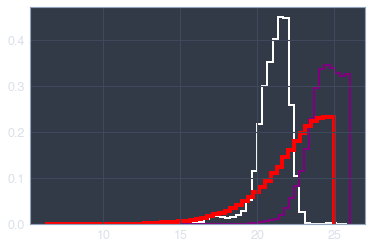

In [6]:
f, ax = plt.subplots()
_ = ax.hist(df['r_mag'], bins=50, histtype='step', color='white', linewidth=2, density=True)
_ = ax.hist(df['u_mag'], bins=50, histtype='step', color='purple', linewidth=2, density=True)
_ = ax.hist(df2['r_mag'], bins=50, histtype='step', color='red', linewidth=4, density=True)
#ax.set_yscale('log')

In [3]:
f2 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/TRILEGAL_model_fID_1757.h5'
df2 = pd.read_hdf(f2)
df2

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.77,0.11,0.71266,-0.866,3.648,4.694,8.8,9.458,0.0,15.734,33.929,28.059,24.126,21.962,20.269,19.329,0.713
1,1,6.87,-0.05,1.74852,1.006,3.922,4.310,9.7,14.033,0.0,11.955,34.730,28.511,24.218,21.684,19.542,18.334,1.749
2,1,6.91,0.27,0.15282,-1.735,3.495,4.282,7.9,4.468,0.0,17.008,30.169,25.393,22.638,20.382,18.974,18.280,0.153
3,1,6.97,0.01,0.20817,-2.208,3.541,5.075,6.5,2.590,0.0,16.790,26.066,22.233,20.146,18.638,17.722,17.276,0.208
4,1,7.07,0.17,2.97909,1.875,4.067,4.251,9.4,10.707,0.0,9.483,27.082,22.543,19.502,17.721,16.171,15.304,2.979
5,1,7.17,0.49,0.81309,-0.629,3.674,4.620,9.1,9.004,0.0,15.444,32.678,27.005,23.303,21.300,19.728,18.856,0.813
6,1,7.23,0.47,0.90638,-0.405,3.706,4.571,9.2,9.768,0.0,14.982,32.838,27.183,23.403,21.328,19.676,18.768,0.906
7,1,7.27,0.03,3.21147,2.014,4.100,4.277,9.8,11.622,0.0,9.535,28.625,23.859,20.546,18.597,16.909,15.976,3.211
8,1,7.55,0.07,0.48125,-1.440,3.590,4.866,8.3,6.044,0.0,16.671,30.337,25.605,22.560,20.707,19.382,18.672,0.481
9,1,7.69,-0.09,1.43520,0.647,3.855,4.314,9.3,9.650,0.0,12.453,28.477,23.922,20.790,18.979,17.489,16.667,1.435


In [ ]:
#671 rows in 1757 on first try

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/TRILEGAL_model_fID_1001.h5'
df = pd.read_hdf(f)
df

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.87,-0.25,0.12840,-1.775,3.511,4.311,8.3,0.043,0.0,17.509,23.568,20.357,18.955,17.750,17.166,16.912,0.128
1,1,6.87,0.11,0.09534,-1.965,3.481,4.253,7.9,0.040,0.0,17.581,24.206,20.971,19.576,18.038,17.287,16.956,0.095
2,1,6.97,-0.03,0.05813,-2.322,3.457,4.299,7.0,0.044,0.0,17.574,24.941,21.456,20.017,18.214,17.344,16.954,0.058
3,1,7.03,-0.23,0.09287,-1.991,3.497,4.330,7.9,0.050,0.0,17.647,24.063,20.746,19.318,17.974,17.328,17.049,0.093
4,1,7.11,-0.05,0.08328,-2.083,3.482,4.316,6.8,0.041,0.0,16.778,23.427,20.150,18.744,17.220,16.481,16.157,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62469,3,10.11,-0.05,0.44490,-1.480,3.590,4.871,14.2,0.047,0.0,22.669,26.986,24.476,23.290,22.617,22.278,22.105,0.445
62470,3,10.11,-0.05,0.68058,-0.811,3.656,4.651,14.4,0.049,0.0,21.198,24.540,22.285,21.356,21.028,20.877,20.778,0.681
62471,3,10.11,-0.03,0.80282,-0.390,3.711,4.522,14.2,0.051,0.0,19.944,22.346,20.579,19.925,19.721,19.644,19.597,0.803
62472,3,10.11,-0.03,0.36893,-1.683,3.575,4.933,14.6,0.043,0.0,23.576,28.156,25.580,24.369,23.566,23.163,22.970,0.369


In [3]:
print(min(df['m_ini']))

0.02366


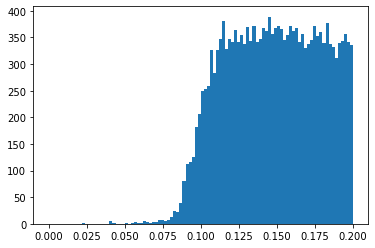

In [11]:
f,ax = plt.subplots()
_ = ax.hist(df['m_ini'],bins=100, range=[0,0.2])


In [5]:
head = pd.read_csv('outputFilesHead.csv')
Nmax = 5e5 #maximum number of stars that we want from TRILEGAL
area0 = np.pi*(3.5/2.)**2. #square degrees (LSST FoV)

In [9]:
galaxy = TRILEGAL()
galaxy.maglim = 30

i = np.where(OpS.fieldID == 1001)[0][0]
print(i)

galaxy.RA = OpS.RA[i]
galaxy.Dec = OpS.Dec[i]
galaxy.fieldID = OpS.fieldID[i]
galaxy.tmpfname = 'TRILEGAL_model_fID_'+str(int(OpS.fieldID[i]))+'.h5'
galaxy.tmpdir = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/'

headVal = head.loc[(head['OpSimID'] == OpS.fieldID[i])]
if (len(headVal.index) > 0):
    print("expected Nstars = ",headVal['NstarsTRILEGAL'].iloc[0])
    if (headVal['NstarsTRILEGAL'].iloc[0] > Nmax):
        galaxy.area = area0*(Nmax/headVal['NstarsTRILEGAL'].iloc[0])**2.

        print("reducing area to", galaxy.area)
else:
    print('dont have OpSim field in header ', OpS.fieldID[i], len(headVal.index))

galaxy.downloadModel()


1000
expected Nstars =  36406.0
downloading model TRILEGAL_model_fID_1001.h5 9.62112750161874


In [10]:
f1 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGALmodels/TRILEGAL_model_fID_1001.h5'
df1 = pd.read_hdf(f1)
df1

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.87,-0.25,0.12840,-1.775,3.511,4.311,8.3,0.043,0.0,17.509,23.568,20.357,18.955,17.750,17.166,16.912,0.128
1,1,6.87,0.11,0.09534,-1.965,3.481,4.253,7.9,0.040,0.0,17.581,24.206,20.971,19.576,18.038,17.287,16.956,0.095
2,1,6.97,-0.03,0.05813,-2.322,3.457,4.299,7.0,0.044,0.0,17.574,24.941,21.456,20.017,18.214,17.344,16.954,0.058
3,1,7.03,-0.23,0.09287,-1.991,3.497,4.330,7.9,0.050,0.0,17.647,24.063,20.746,19.318,17.974,17.328,17.049,0.093
4,1,7.11,-0.05,0.08328,-2.083,3.482,4.316,6.8,0.041,0.0,16.778,23.427,20.150,18.744,17.220,16.481,16.157,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62469,3,10.11,-0.05,0.44490,-1.480,3.590,4.871,14.2,0.047,0.0,22.669,26.986,24.476,23.290,22.617,22.278,22.105,0.445
62470,3,10.11,-0.05,0.68058,-0.811,3.656,4.651,14.4,0.049,0.0,21.198,24.540,22.285,21.356,21.028,20.877,20.778,0.681
62471,3,10.11,-0.03,0.80282,-0.390,3.711,4.522,14.2,0.051,0.0,19.944,22.346,20.579,19.925,19.721,19.644,19.597,0.803
62472,3,10.11,-0.03,0.36893,-1.683,3.575,4.933,14.6,0.043,0.0,23.576,28.156,25.580,24.369,23.566,23.163,22.970,0.369


In [11]:
f2 = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/testing/TRILEGAL/TRILEGAL_model_fID_1001.h5'
df2 = pd.read_hdf(f2)
df2

,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,u_mag,g_mag,r_mag,i_mag,z_mag,Y_mag,Mact
0,1,6.77,0.29,1.30780,0.387,3.804,4.331,11.6,0.048,0.0,15.404,16.790,15.617,15.298,15.249,15.274,15.283,1.308
1,1,6.81,0.03,0.06758,-2.202,3.466,4.281,8.5,0.046,0.0,18.775,25.837,22.468,21.047,19.349,18.522,18.153,0.068
2,1,6.81,0.25,0.18820,-2.124,3.522,4.869,6.1,0.034,0.0,16.181,21.826,18.877,17.567,16.390,15.810,15.558,0.188
3,1,6.87,0.13,1.89744,1.110,3.929,4.269,7.7,0.046,0.0,9.696,10.697,9.679,9.785,9.947,10.079,10.107,1.897
4,1,7.03,0.17,0.09130,-2.019,3.476,4.266,7.8,0.046,0.0,17.617,24.395,21.114,19.706,18.113,17.337,16.994,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97482,3,10.11,-0.03,0.49561,-1.356,3.599,4.833,15.7,0.050,0.0,23.861,28.012,25.534,24.366,23.784,23.488,23.327,0.496
97483,3,10.11,-0.03,0.95064,0.252,3.745,4.090,15.8,0.050,0.0,19.941,21.834,20.387,19.876,19.730,19.690,19.665,0.951
97484,3,10.11,-0.03,0.65950,-0.884,3.647,4.674,16.2,0.042,0.0,23.179,26.674,24.351,23.374,23.019,22.853,22.745,0.660
97485,3,10.11,-0.03,0.24887,-2.020,3.553,5.014,16.8,0.042,0.0,26.620,31.686,28.877,27.609,26.686,26.228,26.024,0.249


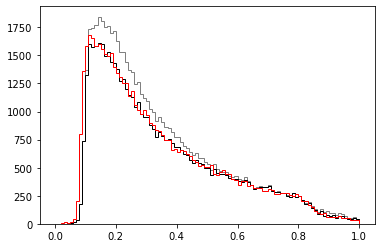

In [36]:
#limit by Y mag (see LSST Science Book table 3.2 on page 67)
f,ax = plt.subplots()
# _ = ax.hist(df1.loc[(df1['Y_mag'] < 22.1)]['m_ini'],bins=100, range=[0,0.7], histtype='step', color='black')
# _ = ax.hist(df2.loc[(df2['Y_mag'] < 22.1)]['m_ini'],bins=100, range=[0,0.7], histtype='step', color='red')

_ = ax.hist(df1['m_ini'],bins=100, range=[0,1], histtype='step', color='gray')
_ = ax.hist(df1.loc[(df1['z_mag'] < 23.5)]['m_ini'],bins=100, range=[0,1], histtype='step', color='black')
_ = ax.hist(df2.loc[(df2['z_mag'] < 23.5)]['m_ini'],bins=100, range=[0,1], histtype='step', color='red')

#ax.set_yscale('log')

In [34]:
N0 = len(df1)
N1 = len(df1.loc[(df1['z_mag'] < 23.5)]['m_ini'])
N2 = len(df2.loc[(df2['z_mag'] < 23.5)]['m_ini'])
print(N0,N1, N2, N2/N1, N0/N1)

62474 55226 57235 1.0363777930684823 1.1312425306920653


In [26]:
N1 = len(df1.loc[(df1['Y_mag'] < 22.1)]['m_ini'])
N2 = len(df2.loc[(df2['Y_mag'] < 22.1)]['m_ini'])
print(N1, N2, N2/N1)

42239 42938 1.0165486872321787
